CSCI 580 AI Assignment 5 
By : Kimaya Sawant




In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [79]:
# Load the dataset with custom column names
data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'label'])

# View the first few rows
print(data.head())


        x1        x2  label
0  0.78051 -0.063669      1
1  0.28774  0.291390      1
2  0.40714  0.178780      1
3  0.29230  0.421700      1
4  0.50922  0.352560      1


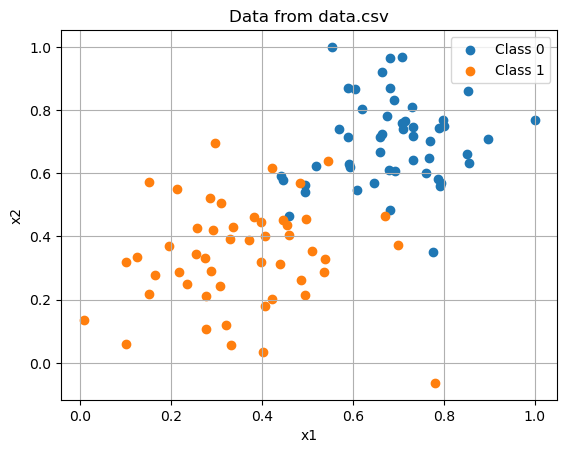

In [80]:
# Extract features and labels
X = data[['x1', 'x2']].values
y = data['label'].values

# Plot the data
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {int(label)}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Data from data.csv")
plt.legend()
plt.grid(True)
plt.show()


In [82]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_line(w, b, color, style='-'):
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, color=color, linestyle=style)

def heuristic_perceptron(X, y, learning_rate=0.1, epochs=20):
    w = np.random.rand(2)
    b = np.random.rand(1)[0]
    
    # Initial line (red)
    plot_line(w, b, color='red')

    for epoch in range(epochs):
        for xi, target in zip(X, y):
            z = np.dot(w, xi) + b
            y_hat = sigmoid(z)
            error = target - y_hat
            w += learning_rate * error * xi
            b += learning_rate * error
        
        # Green dashed line after each epoch
        plot_line(w, b, color='green', style='--')

    # Final black line
    plot_line(w, b, color='black')

    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
    plt.title('Heuristic Perceptron - Decision Boundaries')
    plt.legend()
    plt.show()
    
def run_multiple_heuristic_experiments(X, y, learning_rates, epochs_list):
    """
    Runs heuristic perceptron multiple times with different learning rates and epochs.

    Parameters:
    - learning_rates: list of learning rates to test
    - epochs_list: list of epoch counts to test (must match learning_rates length or be a single value)

    Example:
    run_multiple_heuristic_experiments(X, y, [0.01, 0.1, 1], [65])
    """
    if len(epochs_list) == 1:
        epochs_list = epochs_list * len(learning_rates)
    
    if len(learning_rates) != len(epochs_list):
        raise ValueError("Length of learning_rates and epochs_list must match.")

    for lr, ep in zip(learning_rates, epochs_list):
        print(f"\n Running with learning_rate={lr}, epochs={ep}")
        heuristic_perceptron(X, y, learning_rate=lr, epochs=ep)




 Running with learning_rate=0.01, epochs=30


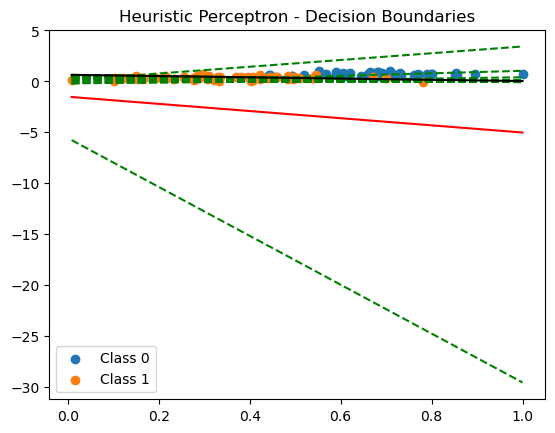


 Running with learning_rate=0.1, epochs=65


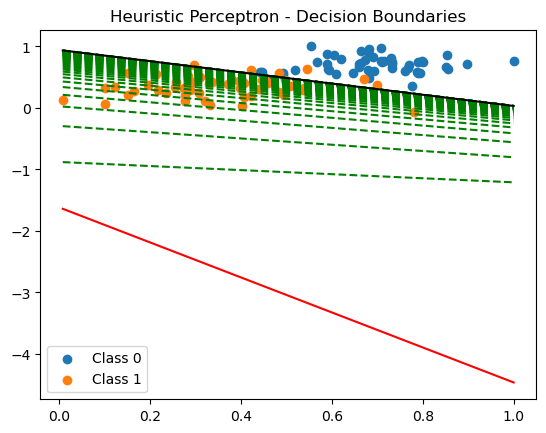


 Running with learning_rate=1, epochs=100


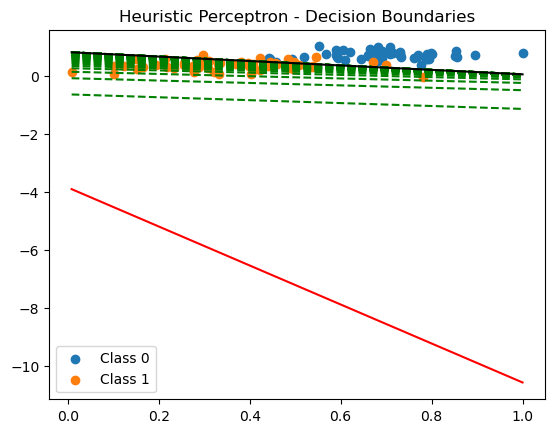

In [83]:
run_multiple_heuristic_experiments(X, y, learning_rates=[0.01, 0.1, 1], epochs_list=[ 30, 65, 100 ])


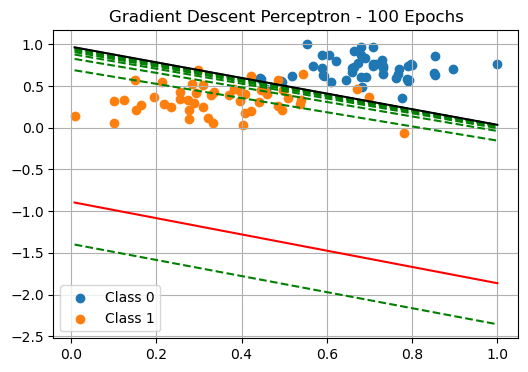

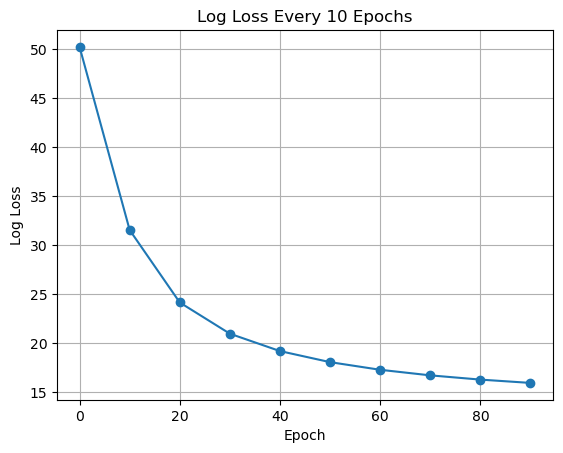

In [84]:
losses = gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100)

# Plot log loss over epochs
plt.plot(range(0, 100, 10), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Log Loss Every 10 Epochs")
plt.grid(True)
plt.show()


In [85]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_line(w, b, color, style='-'):
    x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, color=color, linestyle=style)


def gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100):
    w = np.random.rand(2)
    b = np.random.rand(1)[0]
    losses = []

    plt.figure(figsize=(6, 4))  # Create figure only once

    plot_line(w, b, color='red')  # Initial boundary

    for epoch in range(epochs):
        total_loss = 0
        for xi, target in zip(X, y):
            z = np.dot(w, xi) + b
            y_hat = sigmoid(z)
            loss = - (target * np.log(y_hat + 1e-10) + (1 - target) * np.log(1 - y_hat + 1e-10))
            total_loss += loss

            grad = y_hat - target
            w -= learning_rate * grad * xi
            b -= learning_rate * grad

        if epoch % 10 == 0:
            losses.append(total_loss)
            plot_line(w, b, color='green', style='--')

    # Final decision boundary
    plot_line(w, b, color='black')
    # Plot data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
    plt.title(f'Gradient Descent Perceptron - {epochs} Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return losses

def run_multiple_gradient_experiments(X, y, learning_rates, epochs_list):
    if len(epochs_list) == 1:
        epochs_list = epochs_list * len(learning_rates)

    if len(learning_rates) != len(epochs_list):
        raise ValueError("Length of learning_rates and epochs_list must match.")

    for lr, ep in zip(learning_rates, epochs_list):
        print(f"\n Running with learning_rate={lr}, epochs={ep}")

        # Plot decision boundary
        losses = gradient_descent_perceptron(X, y, learning_rate=lr, epochs=ep)

        # Plot log loss
        plt.figure(figsize=(6, 4))
        plt.plot(range(0, ep, 10), losses, marker='o')
        plt.xlabel("Epoch")
        plt.ylabel("Log Loss")
        plt.title(f"Log Loss - lr={lr}, epochs={ep}")
        plt.grid(True)
        plt.show()



 Running with learning_rate=0.01, epochs=30


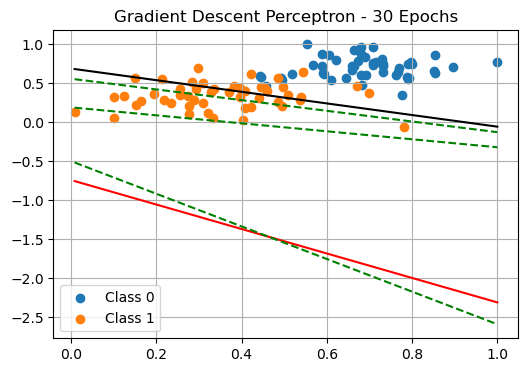

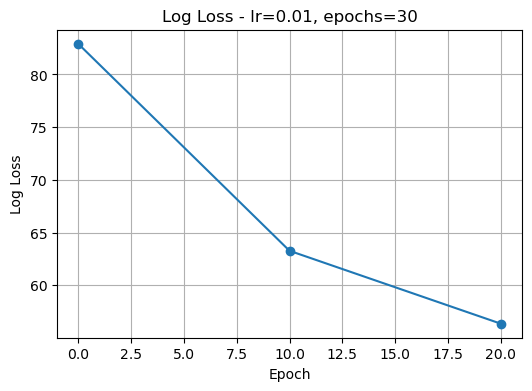


 Running with learning_rate=0.1, epochs=65


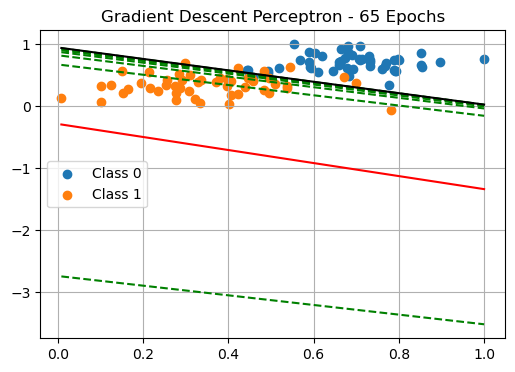

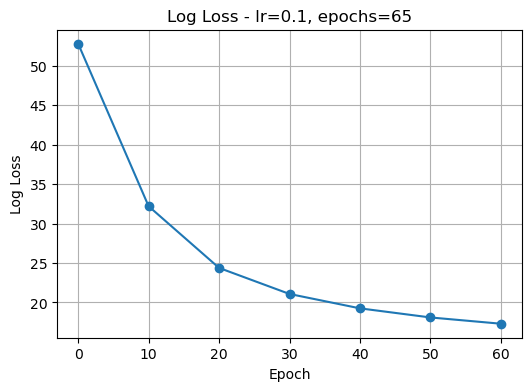


 Running with learning_rate=1, epochs=100


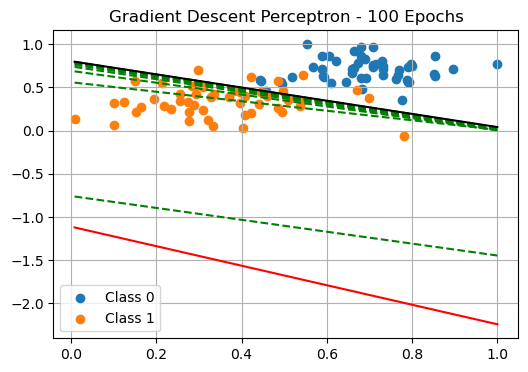

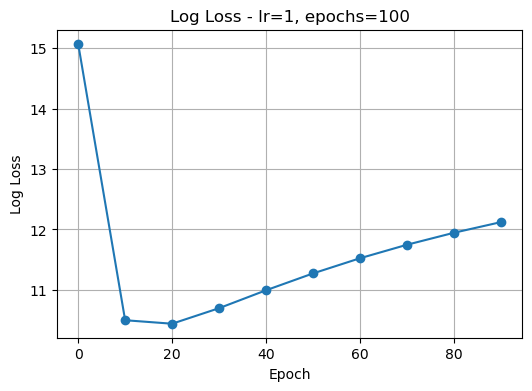

In [86]:
run_multiple_gradient_experiments(
    X, y,
    learning_rates=[0.01, 0.1, 1],
    epochs_list=[30, 65, 100]  # or [60, 80, 100] to vary them
)
